In [1]:
%reset
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import glob
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MO_pipeline/')
import scendict as sc
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/WORK_SCRIPTS')
import breakdown as bp
import numpy as np

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [3]:
ptrc_vars = ['Alkalini','O2','DIC','PIIC', 'NO3','Si', 'PO4','Fer','DOC','CaCO3','ARA','POC','GOC','BAC','PRO',
'PTE','MES','GEL','MAC','DIA','MIX','COC','PIC','PHA','FIX','C11','B14B','C14B','D14B']


diad_vars = ['DOCTRP','EXP', 'GRAMIC', 'GRAMES', 'GRAMAC', 'PPTDOC', 'PPT', 'TChl', 'Detrit', \
             'Carniv', 'Herbiv', 'GRAMICPHY', 'GRAMESPHY', 'GRAMACPHY', 'nitrfix', 'denitr', \
             'DELO2', 'vsink', 'sinksil', 'discarb', 'ExpCO3', 'ExpARA', 'GRAGEL', 'GRAPTE',\
             'proara', 'prococ', 'D14PRO', 'D14RES', 'fdecay', 'bdecay', 'ddecay', 'qtrC14b',\
             'qtrB14b', 'qtrD14b', 'qintC14b', 'Cflx', 'PICflx', 'Oflx', 'dpCO2', 'pCO2',\
             'PPINT']

In [4]:
# baseDir = '/gpfs/afm/greenocean/software/runs/'
# tr = 'TOM12_TJ_1AS7'

# def get_sanity_1var(tr, baseDir, vartyp, tvar, \
#                sdir = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/'):
    
#     fact = 0.5
#     fig, axs = plt.subplots(1,1, figsize=(10*fact, 6*fact), facecolor='w', edgecolor='k')
#     tmin, tmax = bp.max_min_yrs(tr, baseDir)
#     print(f'making sanity check for run {tr}: {tmin}-{tmax}, var {tvar}')
    
#     t_yearlist = bp.make_yearlist(tmin,tmax,vartyp,tr, baseDir)
#     tds = xr.open_mfdataset(t_yearlist, chunks={'time_counter': 120})
    

    
#     td = tds.indexes['time_counter'].to_datetimeindex()

#     print(tvar)
#     yrs = tds[tvar].shape[0]/12

#     gocmean = np.zeros(int(yrs)*12)
#     gocmax = np.zeros(int(yrs)*12)
#     ind = 0
#     for i in range(0,int(yrs)):
#         if i%30 == 0:
#             print(i)
#         goc = tds[tvar][ind:ind+12,:,:,:].values
#         goc[goc == 0] = np.nan
#         w = np.nanmean(np.nanmean(np.nanmean(goc, axis = 3), axis =2), axis =1)
#         gocmean[ind:ind+12] = (w)
#         w = np.nanmax(np.nanmax(np.nanmax(goc, axis = 3), axis =2), axis =1)
#         gocmax[ind:ind+12] = (w)
#         ind = ind+12

#     axs.plot(td,gocmean, label = 'mean')
#     axs.plot(td,gocmax, label = 'max')
#     axs.set_yscale('log')
#     axs.set_title(tvar)
    
#     fig.suptitle(tr)
#     plt.tight_layout()
#     plt.show()
#     #fig.savefig(f'{sdir}/SANITYCHECK_{tr}_{tmin}-{tmax}.png')



In [5]:


def get_sanity(tr, baseDir,\
               sdir = '/gpfs/home/mep22dku/scratch/SOZONE/MODPROC_ROBOT/MultiModelMonitor/OUTPUT/'):
    
    fact = 0.5
    fig, axs = plt.subplots(3,2, figsize=(20*fact, 14*fact), facecolor='w', edgecolor='k')
    axs = axs.ravel()

    tmin, tmax = bp.max_min_yrs(tr, baseDir)
    print(f'making sanity for run {tr}: {tmin}-{tmax}')
    
    t_yearlist = bp.make_yearlist(1948,tmax,'ptrc',tr, baseDir)
    tds_ptrc = xr.open_mfdataset(t_yearlist, chunks={'time_counter': 120})
    t_yearlist = bp.make_yearlist(1948,tmax,'diad',tr, baseDir)
    tds_diad = xr.open_mfdataset(t_yearlist, chunks={'time_counter': 120})
    
    t_dsets = [tds_ptrc, tds_ptrc, tds_diad, tds_diad, tds_diad]
    t_vars = ['GOC', 'POC', 'EXP', 'PPT', 'TChl']
    
    td = tds_ptrc.indexes['time_counter'].to_datetimeindex()
    
    for x in range(0,5):
        tds = t_dsets[x]; tvar = t_vars[x]
        print(tvar)
        yrs = tds[tvar].shape[0]/12

        gocmean = np.zeros(int(yrs)*12)
        gocmax = np.zeros(int(yrs)*12)
        ind = 0
        for i in range(0,int(yrs)):
            if i%30 == 0:
                print(i)
            goc = tds[tvar][ind:ind+12,:,:,:].values
            goc[goc == 0] = np.nan
            w = np.nanmean(np.nanmean(np.nanmean(goc, axis = 3), axis =2), axis =1)
            gocmean[ind:ind+12] = (w)
            w = np.nanmax(np.nanmax(np.nanmax(goc, axis = 3), axis =2), axis =1)
            gocmax[ind:ind+12] = (w)
            ind = ind+12
            
        axs[x].plot(td,gocmean, label = 'mean')
        axs[x].plot(td,gocmax, label = 'max')
        axs[x].set_yscale('log')
        axs[x].set_title(tvar)
    fig.suptitle(tr)
    plt.tight_layout()
    fig.savefig(f'{sdir}/SANITYCHECK_{tr}_{tmin}-{tmax}.png')


making sanity for run TOM12_TJ_1ASA: 1948-2100
GOC
0
30
60
90
120
150
POC
0
30
60
90
120
150
EXP
0
30
60
90
120
150
PPT
0
30
60
90
120
150
TChl
0
30
60
90
120
150
making sanity for run TOM12_TJ_1BSA: 1948-2100
GOC
0
30
60
90
120
150
POC
0
30
60
90
120
150
EXP
0
30
60
90
120
150
PPT
0
30
60
90
120
150
TChl
0
30
60
90
120
150
making sanity for run TOM12_TJ_2ASA: 1948-2100
GOC
0
30
60
90
120
150
POC
0
30
60
90
120
150
EXP
0
30
60
90
120
150
PPT
0
30
60
90
120
150
TChl
0
30
60
90
120
150
making sanity for run TOM12_TJ_2BSA: 1948-2100
GOC
0
30
60
90
120
150
POC
0
30
60
90
120
150
EXP
0
30
60
90
120
150
PPT
0
30
60
90
120
150
TChl
0
30
60
90
120
150
making sanity for run TOM12_TJ_3ASA: 1948-2100
GOC
0
30
60
90
120
150
POC
0
30
60
90
120
150
EXP
0
30
60
90
120
150
PPT
0
30
60
90
120
150
TChl
0
30
60
90
120
150
making sanity for run TOM12_TJ_3BSA: 1948-2100
GOC
0
30
60
90
120
150
POC
0
30
60
90
120
150
EXP
0
30
60
90
120
150
PPT
0
30
60
90
120
150
TChl
0
30
60
90
120
150


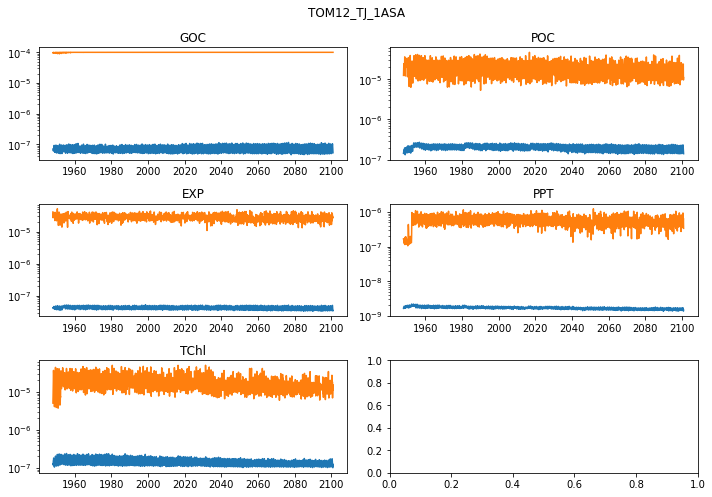

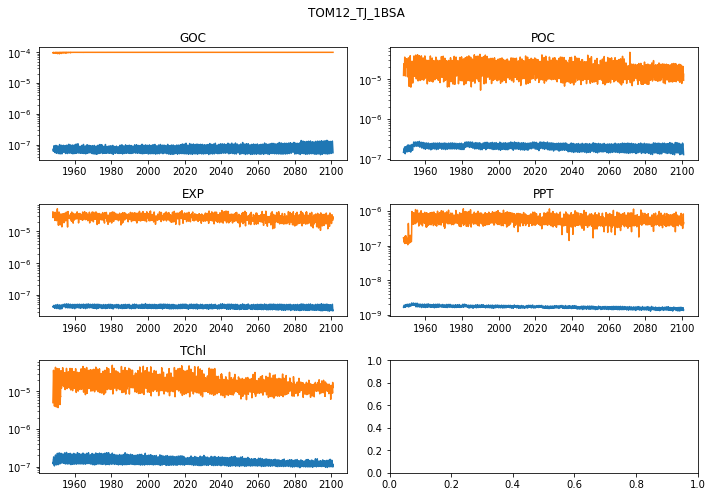

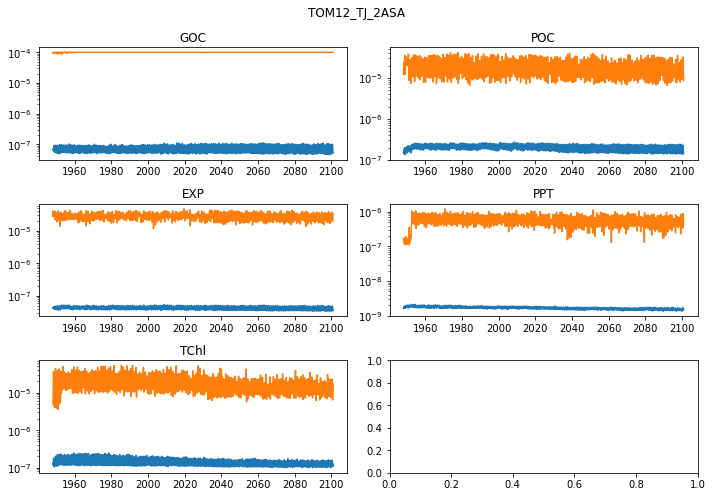

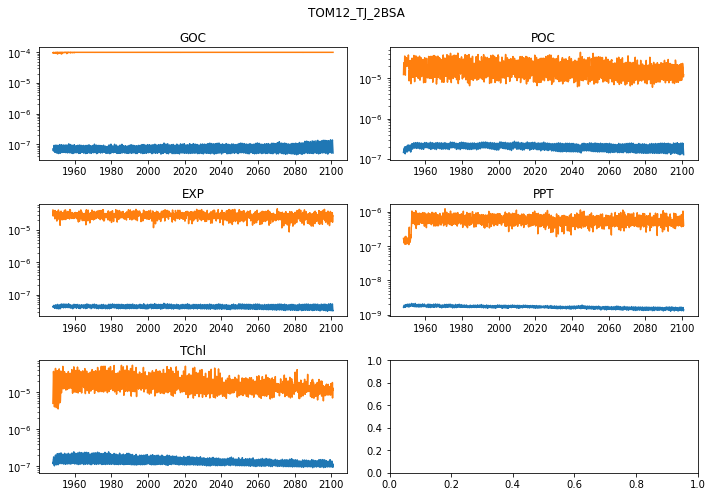

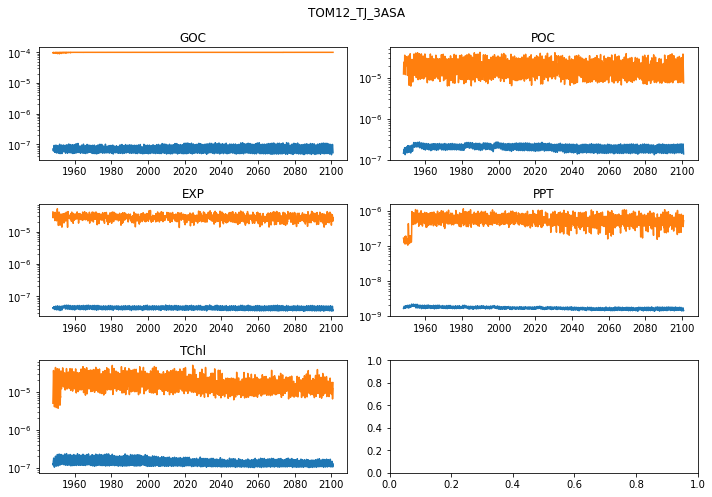

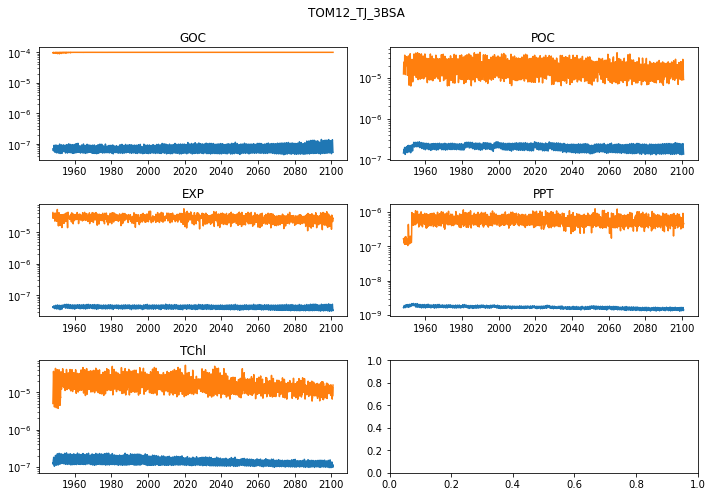

In [6]:
baseDir = '/gpfs/afm/greenocean/software/runs/'
tr = 'TOM12_TJ_1ASA'
get_sanity(tr, baseDir)
tr = 'TOM12_TJ_1BSA'
get_sanity(tr, baseDir)
tr = 'TOM12_TJ_2ASA'
get_sanity(tr, baseDir)
tr = 'TOM12_TJ_2BSA'
get_sanity(tr, baseDir)
tr = 'TOM12_TJ_3ASA'
get_sanity(tr, baseDir)
tr = 'TOM12_TJ_3BSA'
get_sanity(tr, baseDir)